# Fetch Historical Data

In [28]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

[*********************100%%**********************]  1 of 1 completed


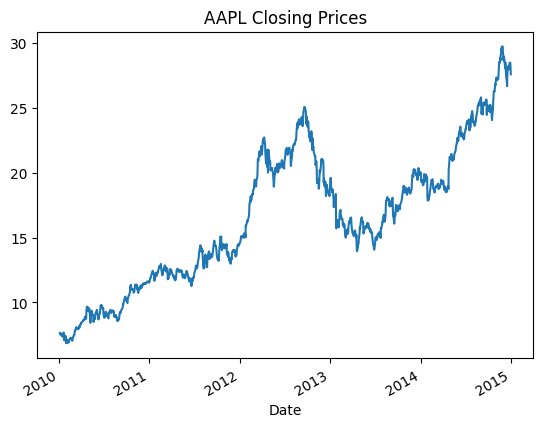

In [29]:

# Fetch historical data
symbol = 'AAPL'  # Example stock symbol
data = yf.download(symbol, start='2010-01-01', end='2015-01-01')
data['Close'].plot(title=f'{symbol} Closing Prices')
plt.show()


# Calculate the Simple Moving Average (SMA)

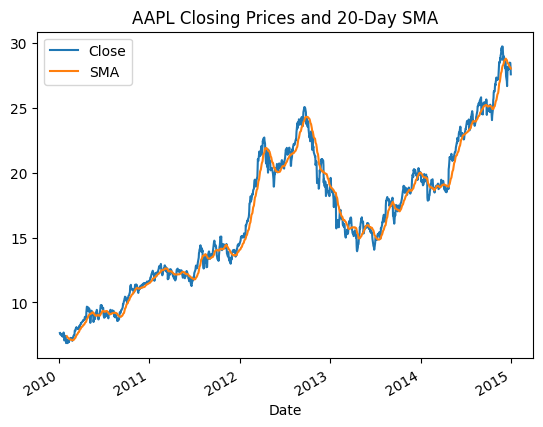

In [30]:
# Define the window for the moving average
window = 20

# Calculate the moving average
data['SMA'] = data['Close'].rolling(window=window).mean()

# Plot the closing prices and the moving average
data[['Close', 'SMA']].plot(title=f'{symbol} Closing Prices and {window}-Day SMA')
plt.show()


# Define the Mean Reverting Strategy

C:\Users\ayman\AppData\Local\Temp\ipykernel_17868\1677208598.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['Position'] = [1 if data['Close'][i] < data['SMA'][i] else -1 if data['Close'][i] > data['SMA'][i] else 0 for i in range(len(data))]


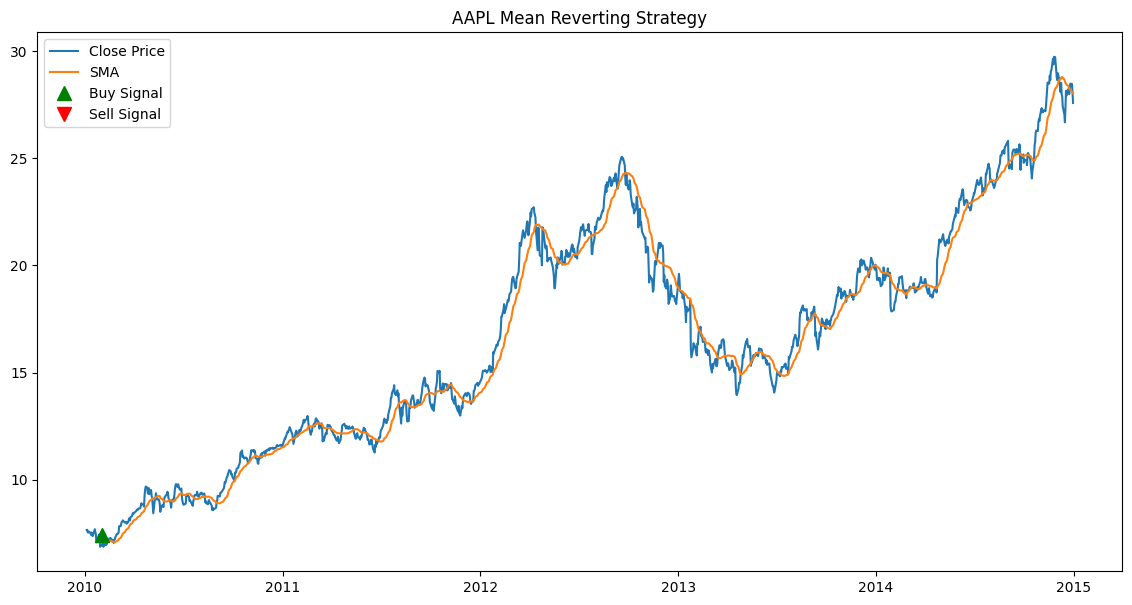

In [31]:
# Define the mean reverting trading strategy
def mean_reverting_strategy(data, window):
    data['Position'] = 0
    data['Position'] = [1 if data['Close'][i] < data['SMA'][i] else -1 if data['Close'][i] > data['SMA'][i] else 0 for i in range(len(data))]
    data['Signal'] = data['Position'].diff()
    return data

# Apply the strategy
data = mean_reverting_strategy(data, window)

# Plot the strategy signals
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA'], label='SMA')
plt.plot(data.loc[data['Signal'] == 1].index, data['SMA'][data['Signal'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(data.loc[data['Signal'] == -1].index, data['SMA'][data['Signal'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
plt.title(f'{symbol} Mean Reverting Strategy')
plt.legend()
plt.show()


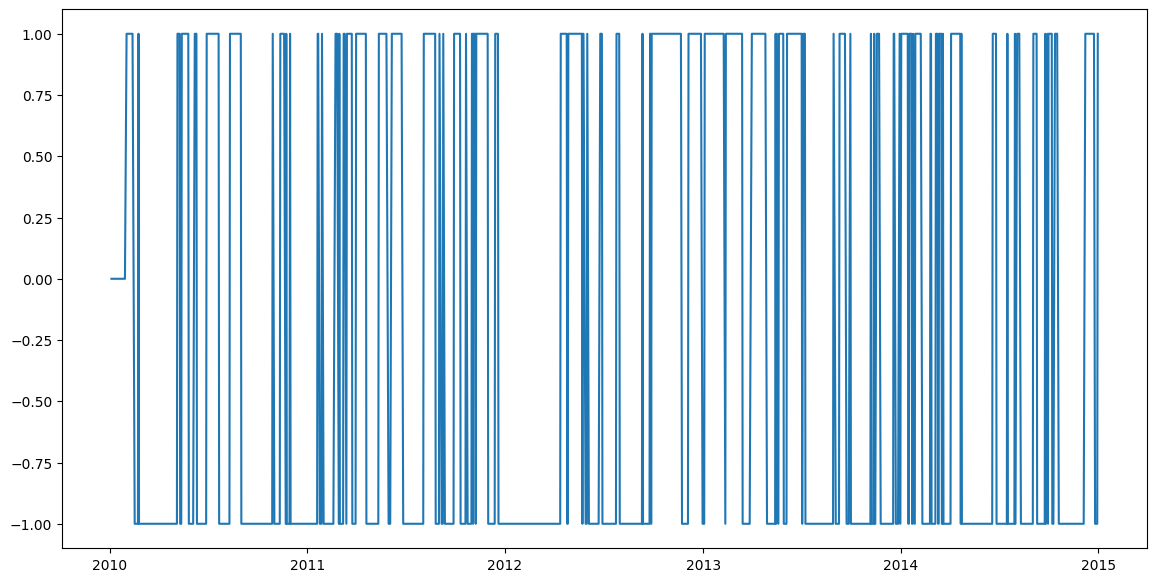

In [32]:
plt.figure(figsize=(14, 7))
plt.plot(data['Position'], label='Pos')
plt.show()

# Backtest the Strategy

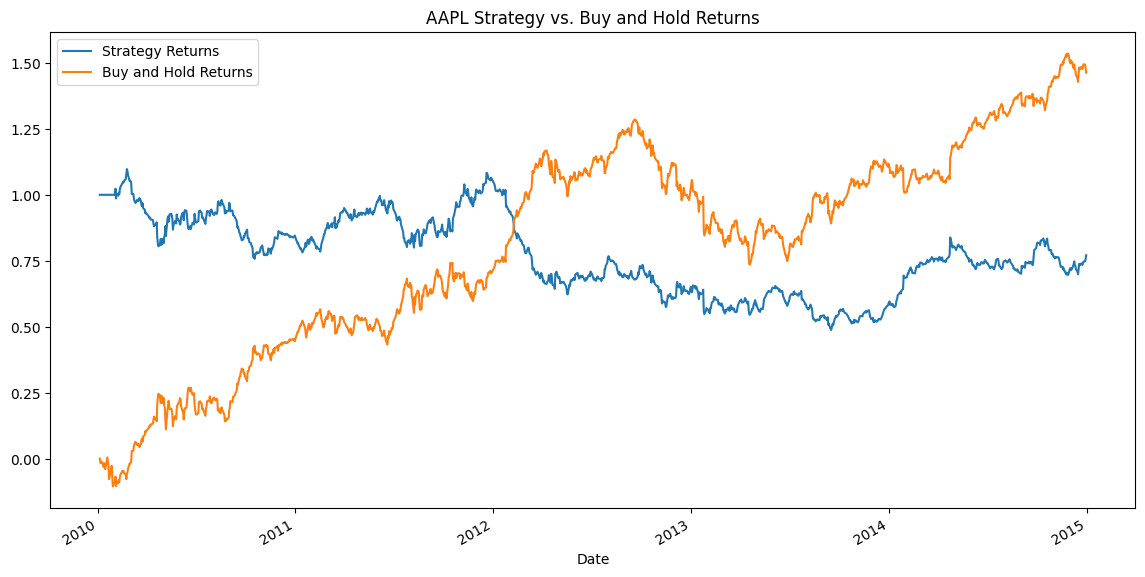

In [33]:
# Calculate the daily returns
data['Returns'] = data['Close'].pct_change()

# Calculate the strategy returns
data['Strategy Returns'] = data['Returns'] * data['Position'].shift(1)

# Calculate the cumulative returns
data['Cumulative Returns'] = (1 + data['Strategy Returns']).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(14, 7))
data['Cumulative Returns'].plot(label='Strategy Returns')
data['Returns'].cumsum().plot(label='Buy and Hold Returns')
plt.title(f'{symbol} Strategy vs. Buy and Hold Returns')
plt.legend()
plt.show()


# Exemple Import Vix yahoo finance

[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2022-01-03  17.600000  18.540001  16.559999  16.600000  16.600000       0
2022-01-04  16.570000  17.809999  16.340000  16.910000  16.910000       0
2022-01-05  17.070000  20.170000  16.580000  19.730000  19.730000       0
2022-01-06  20.290001  21.059999  19.080000  19.610001  19.610001       0
2022-01-07  19.850000  20.799999  18.570000  18.760000  18.760000       0


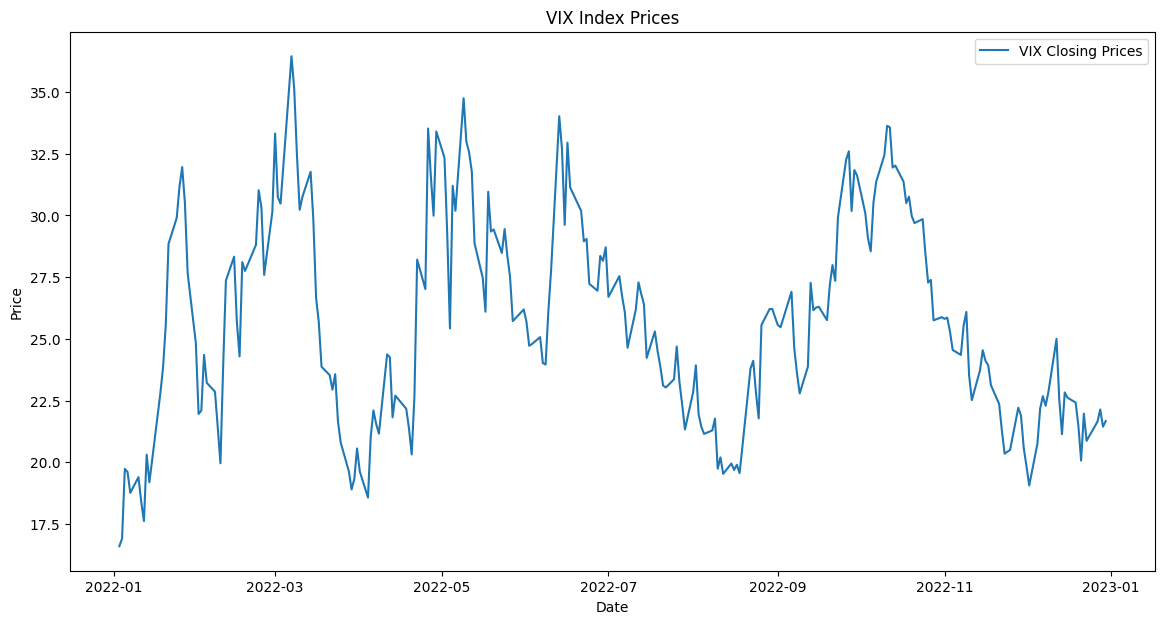

In [34]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the VIX ticker symbol
vix_ticker = "^VIX"

# Fetch VIX data from Yahoo Finance
vix_data = yf.download(vix_ticker, start='2022-01-01', end='2023-01-01')

# Display the first few rows of the VIX data
print(vix_data.head())

# Plotting the VIX data
plt.figure(figsize=(14, 7))
plt.plot(vix_data['Close'], label='VIX Closing Prices')
plt.title('VIX Index Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Exemple import data ETF yahoo finance

[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2022-01-03  77.650002  78.449997  76.500000  76.550003  74.528343  2426020
2022-01-04  76.400002  79.750000  76.400002  78.550003  76.475533  2090140
2022-01-05  79.300003  83.500000  78.800003  83.500000  81.294807  3221560
2022-01-06  84.250000  85.199997  82.099998  83.550003  81.343498  3867600
2022-01-07  83.500000  86.099998  82.750000  85.349998  83.095940  3642240


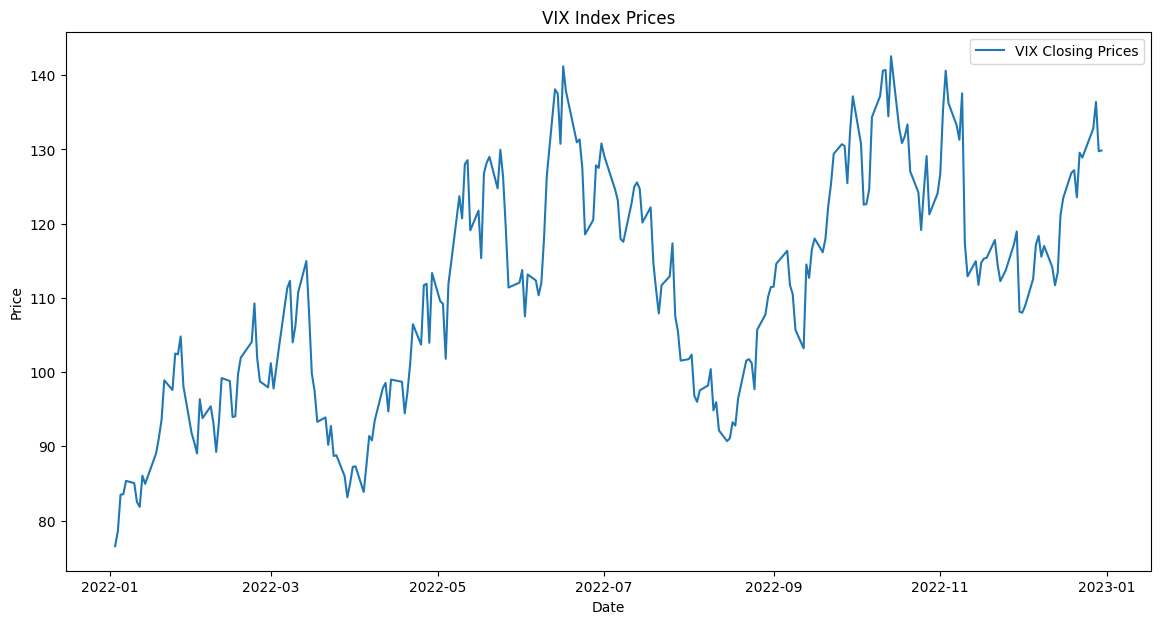

In [40]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the VIX ticker symbol
vix_ticker = "QID"

# Fetch VIX data from Yahoo Finance
vix_data = yf.download(vix_ticker, start='2022-01-01', end='2023-01-01')

# Display the first few rows of the VIX data
print(vix_data.head())

# Plotting the VIX data
plt.figure(figsize=(14, 7))
plt.plot(vix_data['Close'], label='VIX Closing Prices')
plt.title('VIX Index Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# exemple Tkinter

In [1]:
import tkinter as tk

# Create the main window
root = tk.Tk()
root.title("Simple Tkinter App")

# Create a label
label = tk.Label(root, text="Hello, World!")
label.pack(pady=10)

# Function to change the label text
def change_text():
    label.config(text="Button Clicked!")

# Create a button
button = tk.Button(root, text="Click Me", command=change_text)
button.pack(pady=10)

# Run the application
root.mainloop()


In [ ]:
import streamlit as st
import yfinance as yf
import pandas as pd

class YahooFinanceData:
    def __init__(self, ticker):
        self.ticker = ticker
        self.data = None

    def fetch_data(self, start=None, end=None, interval='1d'):
        self.data = yf.download(self.ticker, start=start, end=end, interval=interval)
        return self.data

    def get_latest_price(self):
        if self.data is None:
            self.fetch_data()
        return self.data['Close'].iloc[-1]

    def get_summary(self):
        if self.data is None:
            self.fetch_data()
        summary = {
            'Ticker': self.ticker,
            'Last Close': self.get_latest_price(),
            'Mean Close': self.data['Close'].mean(),
            'Median Close': self.data['Close'].median(),
            'Standard Deviation': self.data['Close'].std(),
            'Total Volume': self.data['Volume'].sum()
        }
        return summary

# Streamlit app
def main():
    st.title("Yahoo Finance Data Viewer")

    ticker = st.text_input("Enter Stock Ticker", "AAPL")
    start_date = st.date_input("Start Date", pd.to_datetime("2023-01-01"))
    end_date = st.date_input("End Date", pd.to_datetime("2023-12-31"))
    interval = st.selectbox("Select Interval", ["1d", "1wk", "1mo"])

    if st.button("Fetch Data"):
        stock_data = YahooFinanceData(ticker)
        data = stock_data.fetch_data(start=start_date, end=end_date, interval=interval)
        
        st.subheader(f"Stock Data for {ticker}")
        st.write(data)

        st.subheader("Summary")
        summary = stock_data.get_summary()
        st.write(summary)

        st.subheader("Closing Price Plot")
        st.line_chart(data['Close'])

if __name__ == "__main__":
    main()
